In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [31]:
from tqdm.notebook import tqdm

In [4]:
from chromalab.observer import Observer, Cone
from chromalab.inks import Neugebauer, InkGamut, CellNeugebauer, Pigment, InkLibrary
from chromalab.spectra import Spectra, Illuminant

In [5]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

In [6]:
%load_ext autoreload
%autoreload 2

## load all inks

In [7]:
all_inks = {}
with open(f'../data/nix/02022024.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        all_inks[name] = spectra
        
with open(f'../data/nix/011624.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        try:
            spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        except ValueError:
            continue
        all_inks[name] = spectra
        
        
with open(f'../data/nix/Inks_all.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        all_inks[name] = spectra
        
cmy_primaries_dict = {}
primary_fns = [
    "000",
    "001",
    "010",
    "100",
    "011",
    "110",
    "101",
    "111",
]

for fn in primary_fns:
    with open(f'../data/nix/PrintColors/{fn}.csv') as csvf:
        spamreader = csv.reader(csvf, delimiter=';')
        for i, row in enumerate(spamreader):
            if i == 4:
                color_data = np.array(row[33:],dtype=float)
                spectra = Spectra(data=color_data, wavelengths=wavelengths10)
                cmy_primaries_dict[fn] = spectra
                
                
all_inks["epson cyan"] = cmy_primaries_dict["100"]
all_inks["epson magenta"] = cmy_primaries_dict["010"]
all_inks["epson yellow"] = cmy_primaries_dict["001"]
paper = cmy_primaries_dict["000"]

/Users/varun/Documents/Python/ChromaLab/chromalab/spectra.py:35: UserWarning: Data has values not between 0 and 1. Clipping.
  warnings.warn("Data has values not between 0 and 1. Clipping.")


In [8]:
del all_inks["Noodlers Firefly"]
del all_inks["PR Neon Yellow"]

In [9]:
len(all_inks)

149

In [10]:
d65 = Illuminant.get("d65")
tetrachromat = Observer.tetrachromat(illuminant=d65, wavelengths=wavelengths10)

## convex hull search

### smaller library

In [11]:
selected_inks = {n: all_inks[n] for n in ['Lamy crystal beryl',
 'Vd sea shell shimmer',
 'Peach haze D',
 'Orange soleil',
 'Pink gazelle',
 'O pink owl',
 'Pw groenmarkt smaragd ',
 'Rose cyclamen H',
 'Orange D',
 'T sea glass',
 'Lamy red',
 'Pilot blue',
 'CT Pastel Yellow',
 'Mg turquoise',
 'Platinum violet',
 'T foxglove',
 'Di citrus yellow',
 'I tsutsuji ',
 'T milky ocean',
 'V isabela',
 'I fuyu gaki ',
 'epson cyan',
 'Operation overlord orange N']}

In [12]:
smaller_library = InkLibrary(selected_inks, paper)

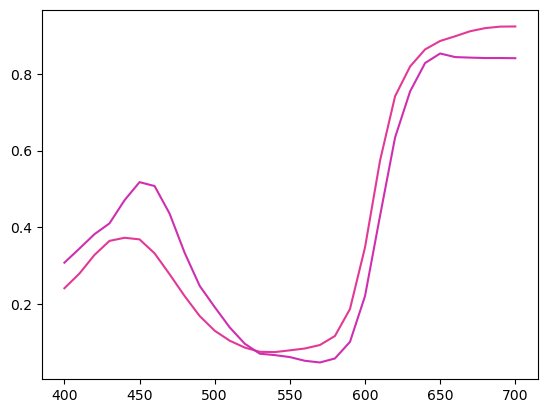

In [16]:
all_inks['I tsutsuji '].plot()
all_inks['Rose cyclamen H'].plot()

In [17]:
smaller_library.convex_hull_search(tetrachromat, d65)

loading km cache: 100%|█████████████| 10879/10879.0 [00:00<00:00, 104762.75it/s]
finding best inkset: 100%|█████████████| 8855/8855.0 [00:00<00:00, 14094.51it/s]


[(5.6821540536506245e-05,
  ['Lamy red', 'Mg turquoise', 'Platinum violet', 'Di citrus yellow']),
 (5.5593197411878e-05,
  ['Lamy red', 'CT Pastel Yellow', 'Mg turquoise', 'Platinum violet']),
 (5.447563349533202e-05,
  ['Lamy crystal beryl', 'Lamy red', 'Mg turquoise', 'Di citrus yellow']),
 (5.389014043242459e-05,
  ['Rose cyclamen H', 'Lamy red', 'Mg turquoise', 'Di citrus yellow']),
 (5.3250328755810525e-05,
  ['Lamy crystal beryl', 'Lamy red', 'CT Pastel Yellow', 'Mg turquoise']),
 (5.2678740105677325e-05,
  ['Rose cyclamen H', 'Lamy red', 'CT Pastel Yellow', 'Mg turquoise']),
 (5.148849863427831e-05,
  ['Peach haze D', 'CT Pastel Yellow', 'Mg turquoise', 'Platinum violet']),
 (4.991048424927342e-05,
  ['Peach haze D', 'Mg turquoise', 'Platinum violet', 'Di citrus yellow']),
 (4.9581039566196705e-05,
  ['Lamy red', 'Mg turquoise', 'Di citrus yellow', 'I tsutsuji ']),
 (4.9433592448788e-05,
  ['Lamy crystal beryl', 'Peach haze D', 'CT Pastel Yellow', 'Mg turquoise']),
 (4.858415987

### full library

In [18]:
full_library = InkLibrary(all_inks, paper)

In [19]:
top_volumes_all_inks = full_library.convex_hull_search(tetrachromat, d65)

loading km cache: 100%|███████| 20271301/20271301.0 [02:54<00:00, 116333.89it/s]
finding best inkset: 100%|█████| 19720001/19720001.0 [20:09<00:00, 16302.85it/s]


In [21]:
top_volumes_all_inks[:30]

[(5.76363453483709e-05,
  ['Lamy red', 'Di citrus yellow', 'Mv Caribbean ', 'Platinum violet']),
 (5.6821540536506245e-05,
  ['Lamy red', 'Di citrus yellow', 'Mg turquoise', 'Platinum violet']),
 (5.67708003445065e-05,
  ['Lamy red', 'Mv Caribbean ', 'CT Pastel Yellow', 'Platinum violet']),
 (5.670271589708648e-05,
  ['Lamy red', 'Di citrus yellow', 'KWZ turquoise ', 'Platinum violet']),
 (5.5606003773535686e-05,
  ['Lamy red', 'KWZ turquoise ', 'CT Pastel Yellow', 'Platinum violet']),
 (5.5593197411878e-05,
  ['Lamy red', 'Mg turquoise', 'CT Pastel Yellow', 'Platinum violet']),
 (5.519597716158461e-05,
  ['Lamy red', 'Di citrus yellow', 'R torquay', 'Platinum violet']),
 (5.506262790565694e-05,
  ['Lamy crystal beryl', 'Lamy red', 'Di citrus yellow', 'Mv Caribbean ']),
 (5.447563349533202e-05,
  ['Lamy crystal beryl', 'Lamy red', 'Di citrus yellow', 'Mg turquoise']),
 (5.430681713323858e-05,
  ['Lamy red', 'Di citrus yellow', 'Platinum violet', 'Inkbara cyan']),
 (5.4290656766416103e-

In [22]:
best_inks = set()
for _, inks in top_volumes_all_inks[:60]:
    best_inks.update(inks)

In [23]:
len(best_inks)

24

In [24]:
print(list(best_inks))

['Di citrus yellow', 'Mg sapphire', 'Bay state blue', 'Rokyu moon yellow', 'Lamy red', 'Mg turquoise', 'O crystal blue', 'CT Pastel Yellow', 'Mv Caribbean ', 'Lamy crystal beryl', 'Bleu pervenche h', 'V karol ', 'Mv sweet life key lime pie ', 'Platinum violet', 'R torquay', 'Inkbara cyan', 'Peach haze D', 'KWZ turquoise ', 'Rose cyclamen H', 'Vd parrot fish', 'C photon', 'Noodler’s yellow', 'I tsutsuji ', 'Pw denneweg groen ']


In [19]:
potential_spots = ['Bay state blue', 'R torquay', 'W dracula', 
                   'KWZ turquoise ', 'Pw denneweg groen ', 'I tsutsuji ', 
                   'Mg turquoise', 'Robert Oster Australian Opal Blue',
                  'Vd parrot fish', 'Lamy crystal beryl','C photon',
                  'Mv sweet life key lime pie ', 'O crystal blue', 
                  'Bleu pervenche h', 'Rokyu moon yellow', 'V karol ','Kaweco green'
                  ]

### is top 6 possible?

In [ ]:
top_volumes_all_inks6 = full_library.convex_hull_search(tetrachromat, d65, k=6)

1,431,727,026 combinations, over one billion, will take 33 hours just to populate the km cache

In [ ]:
all_inks["epson cyan"]

In [ ]:
14297000,725

In [ ]:
for cyan in ["Mg turquoise", 'Mv Caribbean ', 'KWZ turquoise ', "epson cyan"]:
    all_inks[cyan].plot(name=cyan,)
    
plt.legend()

## compare new volume to old

In [ ]:
from chromalab.inks import load_neugebauer

In [ ]:
og_n = load_neugebauer([
    all_inks["epson cyan"],
    all_inks["Operation overlord orange N"],
    all_inks["Platinum violet"],
    all_inks["Peach haze D"]
], paper)

In [ ]:
og_n.n

In [ ]:
from scipy.spatial import ConvexHull

In [ ]:
primaries_array = (og_n.spectras_array ** (50))

In [ ]:
numerator = np.matmul(observe, (primaries_array * illuminant).T)
observe_mix = np.divide(numerator, denominator) # 4 x 16
vol = ConvexHull(observe_mix.T).volume
vol

In [ ]:
7 / 3.15

In [ ]:
potential_spots

## retry 6 ink

In [25]:
illuminant = d65.interpolate_values(wavelengths10).data

In [26]:
observe = tetrachromat.get_sensor_matrix(wavelengths10)

In [27]:
denominator = np.matmul(observe, illuminant.T)[:, np.newaxis]

In [28]:
def get_convex_hull_volume(ink_names):
    inks = [all_inks[n] for n in ink_names]
    neug = load_neugebauer(inks, paper)
    primaries_array = (neug.spectras_array ** 50)
    
    numerator = np.matmul(observe, (primaries_array * illuminant).T)
    observe_mix = np.divide(numerator, denominator) # 4 x 16
    return ConvexHull(observe_mix.T).volume



In [29]:
from itertools import combinations

In [30]:
pairs = list(combinations(list(potential_spots), 2))

NameError: name 'potential_spots' is not defined

In [21]:
len(pairs)

136

In [22]:
from tqdm.notebook import tqdm

In [23]:
top5_scores = []
for _, top4 in tqdm(top_volumes_all_inks[:10]):
    for p in tqdm(all_inks.keys()):
        top5 = top4 + [p]
        score = get_convex_hull_volume(top5)
        top5_scores.append((score, top5))

NameError: name 'top_volumes_all_inks' is not defined

In [ ]:
top5_scores.sort(reverse=True)
top5_scores

In [ ]:
spot_candidates = set()
for _, inks in top5_scores[:100]:
    spot_candidates.update(inks)

In [ ]:
len(spot_candidates)

In [ ]:
spot_candidates

In [ ]:
spot_candidates.remove("Platinum violet")
spot_candidates.remove('Lamy red')
spot_candidates.remove('V karol ')

In [ ]:
pairs = list(combinations(list(spot_candidates), 2))

In [ ]:
len(pairs)

In [ ]:
top_volumes_all_inks

In [ ]:
top6_scores = []
for _, top4 in [[1, ['Lamy red', 'Di citrus yellow','Mg turquoise', 'Platinum violet']]]:
    for p in tqdm(pairs):
        top6 = top4 + list(p)
        score = get_convex_hull_volume(top6)
        top6_scores.append((score, top6))

In [ ]:
top6_scores.sort(reverse=True)

In [ ]:
top6_scores

In [ ]:
all_inks["Kaweco green"].plot()

In [ ]:
all_inks["V maskara "].plot()

## examine

In [24]:
to_examine = [['Lamy red',
   'Di citrus yellow',
   'Mg turquoise',
   'Platinum violet',
   'V maskara ',
   'Kaweco green'],
              ['Lamy red',
   'Di citrus yellow',
   'Mg turquoise',
   'Platinum violet',
   'Bay state blue',
   'Kaweco green'],
              ['Lamy red',
   'Di citrus yellow',
   'Mg turquoise',
   'Platinum violet',
   'Bay state blue',
   'D ancient copper'],
               ['Lamy red',
   'Di citrus yellow',
   'Mg turquoise',
   'Platinum violet',
   'V maskara ',
   'Bay state blue']
             ]

In [27]:
for inkset in to_examine:
    g = InkGamut([all_inks[n] for n in inkset], paper, d65)
    path = f"../outputs/{inkset[-2]},{inkset[-1]}".replace(" ","_")
    g.get_width(tetrachromat, stepsize=0.05, save=path)

Generating point cloud: 858it [06:26,  2.22it/s]                                                                                                                                           


Point cloud generated.
Point cloud saved to ../outputs/V_maskara_,Kaweco_green_point_cloud5.
maximum distance is 1.5 with percentages (0.95000000000000007, 0.90000000000000002, 0.0, 1.0, 0.0, 0.0) and (0.95000000000000007, 0.20000000000000001, 0.10000000000000001, 0.050000000000000003, 0.15000000000000002, 0.20000000000000001)


Generating point cloud: 858it [06:25,  2.23it/s]                                                                                                                                           


Point cloud generated.
Point cloud saved to ../outputs/Bay_state_blue,Kaweco_green_point_cloud5.
maximum distance is 1.5 with percentages (0.95000000000000007, 0.90000000000000002, 0.0, 1.0, 0.0, 0.0) and (1.0, 0.25, 0.25, 0.0, 0.050000000000000003, 0.10000000000000001)


Generating point cloud: 858it [06:44,  2.12it/s]                                                                                                                                           


Point cloud generated.
Point cloud saved to ../outputs/Bay_state_blue,D_ancient_copper_point_cloud5.
maximum distance is 1.5 with percentages (1.0, 0.30000000000000004, 0.0, 0.95000000000000007, 0.0, 0.20000000000000001) and (1.0, 0.050000000000000003, 0.0, 0.0, 0.35000000000000003, 0.050000000000000003)


Generating point cloud: 858it [06:23,  2.24it/s]                                                                                                                                           


Point cloud generated.
Point cloud saved to ../outputs/V_maskara_,Bay_state_blue_point_cloud5.
maximum distance is 1.5 with percentages (1.0, 0.70000000000000007, 0.0, 1.0, 0.050000000000000003, 0.0) and (1.0, 0.20000000000000001, 0.20000000000000001, 0.0, 0.0, 0.20000000000000001)


In [28]:
for a in ['V_maskara_,Bay_state_blue',
          'Bay_state_blue,D_ancient_copper',
          'Bay_state_blue,Kaweco_green',
          'V_maskara_,Kaweco_green'
         ]:
    data_pc = np.load(f'../outputs/{a}_point_cloud5.npy')
    data_perc = np.load(f'../outputs/{a}_percentages5.npy')
    
    np.save(f'../outptuts/{a}_point_cloud5.npy', data_pc.astype(np.float16))
    np.save(f'../outputs/{a}_percentages5.npy', data_perc.astype(np.float16))

## examining good spots

In [ ]:
all_inks["Pw denneweg groen "].plot()

In [ ]:
all_inks['Bay state blue'].plot()
all_inks['V karol '].plot()

In [ ]:
for n in ['Lamy red',
   'Di citrus yellow',
   'Mg turquoise',
   'Platinum violet',
   'Bay state blue',
   'V karol ']:
    all_inks[n].plot()

In [ ]:
for n in ['Lamy red',
   'Di citrus yellow',
   'Mg turquoise',
   'Platinum violet',
   ]:
    all_inks[n].plot()
Cone.m_cone().plot(color='k')
Cone.q_cone().plot(color='k')
Cone.l_cone().plot(color='k')